In [1]:
%load_ext autoreload
%autoreload 2

import sys
import pandas as pd
import numpy as np
import scipy as sp
from scipy import stats
import statsmodels.api as sm
import statsmodels.stats as smstats
from IPython.display import HTML, Markdown, Latex, Math
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
pd.set_option('display.max_rows', 300)
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_colwidth', 80)
pd.set_option('display.precision', 4)
%precision 4
%matplotlib inline

random_seed = 42
h3 = r"<h3>{text}</h3>"
h4_centered = r"<h4><center>{text}</center></h4>"

## Hypothesis test (univariate)
- $H_0$ Null hypothesis: something can be nullified or invalidated, usually "no difference is expected"
- $H_a$ Alternative hypothesis: opposite of the null hypothesis, usually "some difference observed"
- types of tests
 - test of differences: mean, proportation, median, ranking, distributions
 - test of association

### One sample mean, $z$ test and $t$ test, normal distribution
Whether sample mean is significantly different from population mean (hypothesis)
- normally distributed population, $\sigma$ known, or
- $\sigma$ unknown, sample size > 30, independent samples
 - sample mean $\bar x$, pop mean $\mu$
 - Z-score: $\begin{align}\frac{\bar x - \mu}{\sigma\big/\sqrt n}\end{align}$

Example: normal distribution of mean 10+$\delta$, std 1, 30 samples. Test Hypothesis population mean $\neq,\ \le,\ \ge$ 10.
- $H_0:\ \mu=10$, check 3 alternate hypothesis
 - $H_1:\ \mu\neq10$
 - $H_2:\ \mu<10$
 - $H_3:\ \mu>10$
We compute p-value using different approaches, essentially shall have the same results
- compute CDF of test statistics for normal distribution and student distribution
- ztest function of statsmodels
- ttest_1sample function of scipy.stats
- **NOTE:** scipy.stats.ttest_1samp always compute two sided p value of abs(t). Need to adjust for $H_2$ and $H_3$

In [2]:
# directly compute CDF value from normal distribution
# use alternate hypothesis of \lt, \neq, \gt
# population mean and std
# for two sided, multiple p_value by 2. the threshold is always 0.05
deltas=[-.5, 0, .5]
H_alternate=['two_sided', 'left_side', 'right_side']
for delta in deltas:
    HTML(h3.format(text=f"$\delta$ = {delta}"))
    mu, std, N = 10, 1, 30
    mu_real = mu + delta
    # generate data samples
    # normal distribution
    # normal_dist = stats.norm(mu_real, std)
    # x = normal_dist.rvs(size=N, random_state=random_seed)
    rng = np.random.RandomState(random_seed)
    x = rng.randn(N)*std+mu+delta
    
    for h_alt in H_alternate:
        HTML(h4_centered.format(text=f"Alternate H: {h_alt}"))
        Z_dist = stats.norm(0, 1)
        t_dist = stats.t(N-1)

        Z = (x.mean()-mu)/(x.std()/np.sqrt(N-1))
        t = (x.mean()-mu)/(x.std()/np.sqrt(N-1))

        if h_alt == 'two_sided':
            p = Z_dist.cdf(-abs(Z))
            "z score (normal CDF)", Z, p*2
            "statsmodels ztest", sm.stats.ztest(x, value=mu)
            p_t = t_dist.cdf(-abs(t))
            "t score (student CDF)", t, p_t*2
            t, p = stats.ttest_1samp(x, popmean=mu)
            "1 sample t-test", t, p
        elif h_alt == 'left_side':
            p = Z_dist.cdf(Z)
            "z score (normal CDF)", Z, p
            "statsmodels ztest", sm.stats.ztest(x, value=mu, alternative='smaller')
            p_t = t_dist.cdf(t)
            "t score (student CDF)", t, p_t
            t, p = stats.ttest_1samp(x, popmean=mu)
            "1 sample t-test (adjusted)", t, (p/2 if t<0 else 1-p/2)
            f"t(x)={t}, ttest_1samp(x)/2={p/2}"
        else: # 'right_side'
            p = 1-Z_dist.cdf(Z)
            "z score (normal CDF)", Z, p
            "statsmodels ztest", sm.stats.ztest(x, value=mu, alternative='larger')
            p_t = 1-t_dist.cdf(t)
            "t score (student CDF)", t, p_t
            t, p = stats.ttest_1samp(x, popmean=mu)
            "1 sample t-test (adjusted)", t, (p/2 if t>0 else 1-p/2)
            f"t(x)={t}, ttest_1samp(x)/2={p/2}"

pass

('z score (normal CDF)', -4.187898733374785, 2.815490846892387e-05)

('statsmodels ztest', (-4.187898733374785, 2.815490846892387e-05))

('t score (student CDF)', -4.187898733374785, 0.0002396583683886073)

('1 sample t-test', -4.1878987333747855, 0.0002396583683886073)

('z score (normal CDF)', -4.187898733374785, 1.4077454234461935e-05)

('statsmodels ztest', (-4.187898733374785, 1.4077454234461935e-05))

('t score (student CDF)', -4.187898733374785, 0.00011982918419430366)

('1 sample t-test (adjusted)', -4.1878987333747855, 0.00011982918419430366)

't(x)=-4.1878987333747855, ttest_1samp(x)/2=0.00011982918419430366'

('z score (normal CDF)', -4.187898733374785, 0.9999859225457656)

('statsmodels ztest', (-4.187898733374785, 0.9999859225457656))

('t score (student CDF)', -4.187898733374785, 0.9998801708158057)

('1 sample t-test (adjusted)', -4.1878987333747855, 0.9998801708158057)

't(x)=-4.1878987333747855, ttest_1samp(x)/2=0.00011982918419430366'

('z score (normal CDF)', -1.1450173670383417, 0.2522019632828153)

('statsmodels ztest', (-1.1450173670383417, 0.2522019632828153))

('t score (student CDF)', -1.1450173670383417, 0.26156414618801027)

('1 sample t-test', -1.145017367038342, 0.26156414618801016)

('z score (normal CDF)', -1.1450173670383417, 0.12610098164140765)

('statsmodels ztest', (-1.1450173670383417, 0.12610098164140765))

('t score (student CDF)', -1.1450173670383417, 0.13078207309400514)

('1 sample t-test (adjusted)', -1.145017367038342, 0.13078207309400508)

't(x)=-1.145017367038342, ttest_1samp(x)/2=0.13078207309400508'

('z score (normal CDF)', -1.1450173670383417, 0.8738990183585924)

('statsmodels ztest', (-1.1450173670383417, 0.8738990183585924))

('t score (student CDF)', -1.1450173670383417, 0.8692179269059949)

('1 sample t-test (adjusted)', -1.145017367038342, 0.869217926905995)

't(x)=-1.145017367038342, ttest_1samp(x)/2=0.13078207309400508'

('z score (normal CDF)', 1.897863999298091, 0.05771399984826409)

('statsmodels ztest', (1.897863999298091, 0.05771399984826409))

('t score (student CDF)', 1.897863999298091, 0.06770906624859512)

('1 sample t-test', 1.897863999298091, 0.06770906624859512)

('z score (normal CDF)', 1.897863999298091, 0.971143000075868)

('statsmodels ztest', (1.897863999298091, 0.971143000075868))

('t score (student CDF)', 1.897863999298091, 0.9661454668757025)

('1 sample t-test (adjusted)', 1.897863999298091, 0.9661454668757025)

't(x)=1.897863999298091, ttest_1samp(x)/2=0.03385453312429756'

('z score (normal CDF)', 1.897863999298091, 0.028856999924132043)

('statsmodels ztest', (1.897863999298091, 0.028856999924132046))

('t score (student CDF)', 1.897863999298091, 0.03385453312429754)

('1 sample t-test (adjusted)', 1.897863999298091, 0.03385453312429756)

't(x)=1.897863999298091, ttest_1samp(x)/2=0.03385453312429756'

### One sample mean, $z$ and $t$ test, Rayleigh distribution
Whether sample mean is significantly different from population mean (hypothesis)
- normally distributed population, $\sigma$ unknown OR non-normal distribution
- sample size < 30, independent samples
 - sample mean $\bar x$, pop mean $\mu$
 - $s$ is sample standard deviation, $n$ sample size
 - t-value: $\begin{align}\frac{\bar x - \mu}{\hat s\big/\sqrt n}\end{align}$
 - DF (degree of freedom): n-1

Example: rayleigh distribution (asymmetric) of mean 1.2533+$\delta$, std 0.655, 20 samples. Test Hypothesis $\neq,\ \le,\ \ge$ population mean.
- $H_0:\ \mu=\mu_{pop}$, 
- **NOTE:** rayleigh is asymmetrical distribution, therefore results for -delta and delta are different.
- When N increase, ttest and ztest results do not seem to converge?

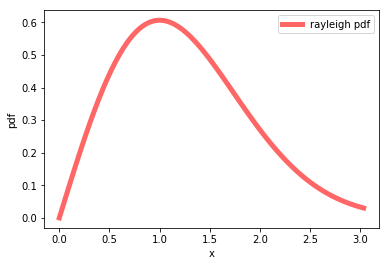

In [3]:
rayleigh = stats.rayleigh()
rayleigh.stats('mvsk')
x = np.linspace(rayleigh.ppf(0.00), rayleigh.ppf(.99), 100)
plt.plot(x, rayleigh.pdf(x), 'r-', lw=5, alpha=0.6, label='rayleigh pdf');
plt.legend(loc='best');
plt.xlabel('x');
plt.ylabel('pdf');

In [4]:
# directly compute CDF value from normal distribution
# population mean and std
deltas = [-0.1, 0, 0.1]

for delta in deltas:
    HTML(h3.format(text=f"$\delta$ = {delta}"))

    # generate rayleight distribution rv
    mu, std, N = 1.2533, 1, 30
    mu_real = mu + delta
    rayleigh_dist = stats.rayleigh(loc=delta)
    x = rayleigh_dist.rvs(N, random_state=random_seed)
    # 'Mean, Variance', uniform_dist.stats('mv')
    # uniform distribution
    #mu, std, N = 0.5, 1, 100
    #uniform_dist = stats.uniform(loc=delta)
    #x = uniform_dist.rvs(N, random_state=random_seed)
    #'Mean, Variance', uniform_dist.stats('mv')

    for h_alt in H_alternate:
        HTML(h4_centered.format(text=f"Alternate H: {h_alt}"))
        Z_dist = stats.norm(0, 1)
        t_dist = stats.t(N-1)
        Z = (x.mean()-mu)/(x.std()/np.sqrt(N-1))
        t = (x.mean()-mu)/(x.std()/np.sqrt(N-1))

        if h_alt == 'two_sided':
            p = Z_dist.cdf(-abs(Z))
            "z score (normal CDF)", Z, p*2
            "statsmodels ztest", sm.stats.ztest(x, value=mu)
            p_t = t_dist.cdf(-abs(t))
            "t score (student CDF)", t, p_t*2
            t, p = stats.ttest_1samp(x, popmean=mu)
            "1 sample t-test", t, p
        elif h_alt == 'left_side':
            p = Z_dist.cdf(Z)
            "z score (normal CDF)", Z, p
            "statsmodels ztest", sm.stats.ztest(x, value=mu, alternative='smaller')
            p_t = t_dist.cdf(t)
            "t score (student CDF)", t, p_t
            t, p = stats.ttest_1samp(x, popmean=mu)
            "1 sample t-test (adjusted)", t, (p/2 if t<0 else 1-p/2)
            f"t(x)={t}, ttest_1samp(x)/2={p/2}"
        else: # 'right_side'
            p = 1-Z_dist.cdf(Z)
            "z score (normal CDF)", Z, p
            "statsmodels ztest", sm.stats.ztest(x, value=mu, alternative='larger')
            p_t = 1-t_dist.cdf(t)
            "t score (student CDF)", t, p_t
            t, p = stats.ttest_1samp(x, popmean=mu)
            "1 sample t-test (adjusted)", t, (p/2 if t>0 else 1-p/2)
            f"t(x)={t}, ttest_1samp(x)/2={p/2}"

pass

('z score (normal CDF)', -2.1029151868161393, 0.03547318404105932)

('statsmodels ztest', (-2.1029151868161393, 0.03547318404105932))

('t score (student CDF)', -2.1029151868161393, 0.04426685677652784)

('1 sample t-test', -2.1029151868161393, 0.04426685677652784)

('z score (normal CDF)', -2.1029151868161393, 0.01773659202052966)

('statsmodels ztest', (-2.1029151868161393, 0.01773659202052966))

('t score (student CDF)', -2.1029151868161393, 0.02213342838826392)

('1 sample t-test (adjusted)', -2.1029151868161393, 0.02213342838826392)

't(x)=-2.1029151868161393, ttest_1samp(x)/2=0.02213342838826392'

('z score (normal CDF)', -2.1029151868161393, 0.9822634079794703)

('statsmodels ztest', (-2.1029151868161393, 0.9822634079794703))

('t score (student CDF)', -2.1029151868161393, 0.9778665716117361)

('1 sample t-test (adjusted)', -2.1029151868161393, 0.9778665716117361)

't(x)=-2.1029151868161393, ttest_1samp(x)/2=0.02213342838826392'

('z score (normal CDF)', -1.2028032052199853, 0.2290524841756253)

('statsmodels ztest', (-1.2028032052199853, 0.2290524841756253))

('t score (student CDF)', -1.2028032052199853, 0.23878100888073334)

('1 sample t-test', -1.2028032052199853, 0.23878100888073334)

('z score (normal CDF)', -1.2028032052199853, 0.11452624208781265)

('statsmodels ztest', (-1.2028032052199853, 0.11452624208781265))

('t score (student CDF)', -1.2028032052199853, 0.11939050444036667)

('1 sample t-test (adjusted)', -1.2028032052199853, 0.11939050444036667)

't(x)=-1.2028032052199853, ttest_1samp(x)/2=0.11939050444036667'

('z score (normal CDF)', -1.2028032052199853, 0.8854737579121874)

('statsmodels ztest', (-1.2028032052199853, 0.8854737579121874))

('t score (student CDF)', -1.2028032052199853, 0.8806094955596333)

('1 sample t-test (adjusted)', -1.2028032052199853, 0.8806094955596333)

't(x)=-1.2028032052199853, ttest_1samp(x)/2=0.11939050444036667'

('z score (normal CDF)', -0.3026912236238317, 0.7621251867594626)

('statsmodels ztest', (-0.30269122362383166, 0.7621251867594626))

('t score (student CDF)', -0.3026912236238317, 0.7642857679517796)

('1 sample t-test', -0.30269122362383166, 0.7642857679517797)

('z score (normal CDF)', -0.3026912236238317, 0.3810625933797313)

('statsmodels ztest', (-0.30269122362383166, 0.3810625933797313))

('t score (student CDF)', -0.3026912236238317, 0.3821428839758898)

('1 sample t-test (adjusted)', -0.30269122362383166, 0.38214288397588986)

't(x)=-0.30269122362383166, ttest_1samp(x)/2=0.38214288397588986'

('z score (normal CDF)', -0.3026912236238317, 0.6189374066202686)

('statsmodels ztest', (-0.30269122362383166, 0.6189374066202686))

('t score (student CDF)', -0.3026912236238317, 0.6178571160241102)

('1 sample t-test (adjusted)', -0.30269122362383166, 0.6178571160241102)

't(x)=-0.30269122362383166, ttest_1samp(x)/2=0.38214288397588986'

### Two-sample mean difference (indenpendent), $z$ and $t$ test,
Whether two sample means are different from each other
- two normally distributed and independent population, $\sigma$ known, or
- $\sigma$ unknown, sample size > 30, independent samples
 - sample mean $\bar x_1$, $\bar x_2$, pop mean difference $\Delta$
 - pop deviation $\sigma_1$, $\sigma_2$
 - Z-score: $\begin{align}\frac{\bar x_1-\bar x_2 - \Delta}{\sqrt{\frac{\sigma_1^2}{n_1} + \frac{\sigma_1^2}{n_2}}}\end{align}$

**OR**
- two normally distributed and independent population, $\sigma$ unknown
- sample size > 25, independent samples
 - sample mean $\bar x_1$, $\bar x_2$, pop mean difference $\Delta$\
 - sample deviation $\hat s_1$, $\hat s_2$
 - t-stats: $\begin{align}\frac{\bar x_1-\bar x_2 - \Delta}{\sqrt{\frac{\hat s_1^2}{n_1} + \frac{\hat s_1^2}{n_2}}}\end{align}$
 - DF: $n_1+n_2-1$

This is to compare means of smaples from two independent distribution
- $H_0:\ \mu_1=\mu_2$

**NOTE:**
- "pooled": equal variances, "unpooled": unequal variances
- when compute sum of squares $(n-1) s^2$, either use n\*x.var() or (n-1)\*x.var(ddof=1)
- scipy.stats.ttest_ind always compute two sided p value of abs(t). Need to adjust for $H_2$ and $H_3$

In [5]:
# directly compute CDF value from normal distribution
# use alternate hypothesis of \lt, \neq, \gt
# population mean and std
# for two sided, multiple p_value by 2. the threshold is always 0.05
deltas=[-.25, 0.25]
H_alternate=['two_sided', 'left_side', 'right_side']
for delta in deltas:
    HTML(h3.format(text=f"$\delta$ = {delta}"))
    mu, std, n1, n2 = 10, 1, 25, 30
    mu_real = mu + delta
    # generate data samples
    # normal distribution
    dist1 = stats.norm(mu, std)
    dist2 = stats.norm(mu_real, std)
    x1 = dist1.rvs(size=n1, random_state=random_seed)
    x2 = dist2.rvs(size=n2, random_state=(random_seed*2))
    
    for h_alt in H_alternate:
        HTML(h4_centered.format(text=f"Alternate H: {h_alt}"))
        Z_dist = stats.norm(0, 1)
        t_dist = stats.t(n1+n2-2)

        Z = (x1.mean()-x2.mean())/np.sqrt(x1.var()/(n1-1)+x2.var()/(n2-1))
        s_p = ((n1-1)*x1.var(ddof=1) + (n2-1)*x2.var(ddof=1))/(n1+n2-2)
        t = (x1.mean()-x2.mean())/(np.sqrt(s_p*(1/n1+1/n2)))

        t_unpooled = (x1.mean()-x2.mean())/np.sqrt(x1.var()/(n1-1)+x2.var()/(n2-1))
        df_unpooled = (x1.var()/n1+x2.var()/n2)**2/( (x1.var()/n1)**2/(n1-1)+(x2.var()/n2)**2/(n2-1))
        t_dist_unpooled = stats.t(df_unpooled)

        if h_alt == 'two_sided':
            p = Z_dist.cdf(-abs(Z))
            "z score (normal CDF)", Z, p*2
            "statsmodels ztest", sm.stats.ztest(x1, x2)
            p_t = t_dist.cdf(-abs(t))
            "t score (pooled student CDF)", t, p_t*2
            p_t = t_dist_unpooled.cdf(-abs(t_unpooled))
            "t score (unpooled student CDF)", t_unpooled, p_t*2
            t, p = stats.ttest_ind(x1, x2, equal_var=True)   # equal var
            "2 sample t-test (scipy)", t, p
            t, p, df = sm.stats.ttest_ind(x1, x2, usevar='pooled')  # pooled: equal var, unequal: diff var
            "2 sample t-test (sm pooled)", t, float(p), float(df)
            t, p, df = sm.stats.ttest_ind(x1, x2, usevar='unequal')  # pooled: equal var, unequal: diff var
            "2 sample t-test (sm unpooled)", t, float(p), float(df)

        elif h_alt == 'left_side':
            p = Z_dist.cdf(Z)
            "z score (normal CDF)", Z, p
            "statsmodels ztest", sm.stats.ztest(x1, x2, value=0, alternative='smaller')
            p_t = t_dist.cdf(-abs(t))
            "t score (pooled student CDF)", t, p_t*2
            p_t = t_dist_unpooled.cdf(-abs(t_unpooled))
            "t score (unpooled student CDF)", t_unpooled, p_t*2
            t, p = stats.ttest_ind(x1, x2, equal_var=True)
            "2 sample t-test (scipy)", t, (p/2 if t<0 else 1-p/2)
            t, p, df = sm.stats.ttest_ind(x1, x2, alternative='smaller', usevar='pooled')  # pooled: equal var, unequal: diff var
            "2 sample t-test (sm pooled)", t, float(p), float(df)
            t, p, df = sm.stats.ttest_ind(x1, x2, alternative='smaller', usevar='unequal')  # pooled: equal var, unequal: diff var
            "2 sample t-test (sm unpooled)", t, float(p), float(df)
        else: # 'right_side'
            p = 1-Z_dist.cdf(Z)
            "z score (normal CDF)", Z, p
            "statsmodels ztest", sm.stats.ztest(x1, x2, value=0, alternative='larger')
            p_t = t_dist.cdf(-abs(t))
            "t score (pooled student CDF)", t, p_t*2
            p_t = t_dist_unpooled.cdf(-abs(t_unpooled))
            "t score (unpooled student CDF)", t_unpooled, p_t*2
            t, p = stats.ttest_ind(x1, x2, equal_var=True)
            "2 sample t-test (scipy)", t, (p/2 if t>0 else 1-p/2)
            t, p, df = sm.stats.ttest_ind(x1, x2, alternative='larger', usevar='pooled')  # pooled: equal var, unequal: diff var
            "2 sample t-test (sm pooled)", t, float(p), float(df)
            t, p, df = sm.stats.ttest_ind(x1, x2, alternative='larger', usevar='unequal')  # pooled: equal var, unequal: diff var
            "2 sample t-test (sm unpooled)", t, float(p), float(df)

pass

('z score (normal CDF)', 1.7855909011666655, 0.0741655212071542)

('statsmodels ztest', (1.7978928742848388, 0.07219398556160762))

('t score (pooled student CDF)', 1.7978928742848388, 0.077891023026402)

('t score (unpooled student CDF)', 1.7855909011666655, 0.08026300031956757)

('2 sample t-test (scipy)', 1.7978928742848388, 0.077891023026402)

('2 sample t-test (sm pooled)', 1.7978928742848246, 0.0779, 53.0000)

('2 sample t-test (sm unpooled)', 1.785590901166651, 0.0803, 49.6581)

('z score (normal CDF)', 1.7855909011666655, 0.9629172393964229)

('statsmodels ztest', (1.7978928742848388, 0.9639030072191962))

('t score (pooled student CDF)', 1.7978928742848388, 0.077891023026402)

('t score (unpooled student CDF)', 1.7855909011666655, 0.08026300031956757)

('2 sample t-test (scipy)', 1.7978928742848388, 0.961054488486799)

('2 sample t-test (sm pooled)', 1.7978928742848246, 0.9611, 53.0000)

('2 sample t-test (sm unpooled)', 1.785590901166651, 0.9599, 49.6581)

('z score (normal CDF)', 1.7855909011666655, 0.03708276060357707)

('statsmodels ztest', (1.7978928742848388, 0.03609699278080381))

('t score (pooled student CDF)', 1.7978928742848388, 0.077891023026402)

('t score (unpooled student CDF)', 1.7855909011666655, 0.08026300031956757)

('2 sample t-test (scipy)', 1.7978928742848388, 0.038945511513201)

('2 sample t-test (sm pooled)', 1.7978928742848246, 0.0389, 53.0000)

('2 sample t-test (sm unpooled)', 1.785590901166651, 0.0401, 49.6581)

('z score (normal CDF)', -0.2081911703809967, 0.8350797025643513)

('statsmodels ztest', (-0.2096255203095244, 0.8339599598360039))

('t score (pooled student CDF)', -0.2096255203095244, 0.8347636730522061)

('t score (unpooled student CDF)', -0.2081911703809967, 0.8359298670679491)

('2 sample t-test (scipy)', -0.2096255203095244, 0.8347636730522061)

('2 sample t-test (sm pooled)', -0.20962552030953863, 0.8348, 53.0000)

('2 sample t-test (sm unpooled)', -0.20819117038101081, 0.8359, 49.6581)

('z score (normal CDF)', -0.2081911703809967, 0.41753985128217563)

('statsmodels ztest', (-0.2096255203095244, 0.41697997991800195))

('t score (pooled student CDF)', -0.2096255203095244, 0.8347636730522061)

('t score (unpooled student CDF)', -0.2081911703809967, 0.8359298670679491)

('2 sample t-test (scipy)', -0.2096255203095244, 0.41738183652610306)

('2 sample t-test (sm pooled)', -0.20962552030953863, 0.4174, 53.0000)

('2 sample t-test (sm unpooled)', -0.20819117038101081, 0.4180, 49.6581)

('z score (normal CDF)', -0.2081911703809967, 0.5824601487178244)

('statsmodels ztest', (-0.2096255203095244, 0.583020020081998))

('t score (pooled student CDF)', -0.2096255203095244, 0.8347636730522061)

('t score (unpooled student CDF)', -0.2081911703809967, 0.8359298670679491)

('2 sample t-test (scipy)', -0.2096255203095244, 0.5826181634738969)

('2 sample t-test (sm pooled)', -0.20962552030953863, 0.5826, 53.0000)

('2 sample t-test (sm unpooled)', -0.20819117038101081, 0.5820, 49.6581)

### Paired difference $t$ test, compare means
Whether two related sample means are significantly different. For example, blood pressure before and after medicine
- Paired observation from a normal distribution
- sample size < 25, independent samples
 - sample mean $\bar x$, $\Delta$ is hypothesized mean difference
 - $s$ is sample standard deviation of the differences, $n$ sample size
 - t-value: $\begin{align}\frac{\bar x - \Delta}{\hat s\big/\sqrt n}\end{align}$
 - DF (degree of freedom): n-1

This is to compare means of smaples from paired distribution
- $H_0:\ \mu(1)=\mu(2)$
- scipy.stats.ttest_rel always compute two sided p value of abs(t). Need to adjust for left side or right side $H_\alpha$

In [6]:
# directly compute CDF value from normal distribution
# use alternate hypothesis of \lt, \neq, \gt
# population mean and std
# for two sided, multiple p_value by 2. the threshold is always 0.05
deltas=[-.3, 0, 0.3]
H_alternate=['two_sided', 'left_side', 'right_side']
for delta in deltas:
    HTML(h3.format(text=f"$\delta$ = {delta}"))
    mu, std, N = 10, 1, 30
    mu_real = mu + delta
    # generate data samples
    # normal distribution
    dist1 = stats.norm(mu, std)
    dist2 = stats.norm(delta, std)
    x1 = dist1.rvs(size=N, random_state=random_seed)
    x2 = x1 + dist2.rvs(size=N)
    x = x1 - x2
    
    for h_alt in H_alternate:
        HTML(h4_centered.format(text=f"Alternate H: {h_alt}"))
        t_dist = stats.t(N-1)

        t = x.mean()/np.sqrt(x.var()/(N-1))

        if h_alt == 'two_sided':
            p_t = t_dist.cdf(-abs(t))
            "t score (student CDF)", t, p_t*2
            t, p = stats.ttest_rel(x1, x2)
            "2 sample t-test (scipy)", t, p
            t, tp1, tp2 = sm.stats.ttost_paired(x1, x2, 0, 0)
            "2 sample t-test (sm pooled)", t
            tp1, tp2

        elif h_alt == 'left_side':
            p_t = t_dist.cdf(t)
            "t score (student CDF)", t, p_t
            t, p = stats.ttest_rel(x1, x2)
            "paired t-test (scipy)", t, (p/2 if t<0 else 1-p/2)
            t, tp1, tp2 = sm.stats.ttost_paired(x1, x2, 0, 0)
            "paired t-test (statsmodels)", t
            tp1, tp2
        else: # 'right_side'
            p_t = 1-t_dist.cdf(t)
            "t score (student CDF)", t, p_t
            t, p = stats.ttest_rel(x1, x2)
            "paired t-test (scipy)", t, (p/2 if t>0 else 1-p/2)
            t, tp1, tp2 = sm.stats.ttost_paired(x1, x2, 0, 0)
            "paired t-test (statsmodels)", t
            tp1, tp2

pass

('t score (student CDF)', -0.6622248219302276, 0.5130558436835859)

('2 sample t-test (scipy)', -0.6622248219302276, 0.5130558436835859)

('2 sample t-test (sm pooled)', 0.7434720781582069)

((-0.6622248219302276, 0.7434720781582069, 29.0),
 (-0.6622248219302276, 0.25652792184179296, 29.0))

('t score (student CDF)', -0.6622248219302276, 0.25652792184179296)

('paired t-test (scipy)', -0.6622248219302276, 0.25652792184179296)

('paired t-test (statsmodels)', 0.7434720781582069)

((-0.6622248219302276, 0.7434720781582069, 29.0),
 (-0.6622248219302276, 0.25652792184179296, 29.0))

('t score (student CDF)', -0.6622248219302276, 0.743472078158207)

('paired t-test (scipy)', -0.6622248219302276, 0.743472078158207)

('paired t-test (statsmodels)', 0.7434720781582069)

((-0.6622248219302276, 0.7434720781582069, 29.0),
 (-0.6622248219302276, 0.25652792184179296, 29.0))

('t score (student CDF)', -0.7352772011261675, 0.46807585218054126)

('2 sample t-test (scipy)', -0.7352772011261675, 0.46807585218054126)

('2 sample t-test (sm pooled)', 0.7659620739097293)

((-0.7352772011261673, 0.7659620739097293, 29.0),
 (-0.7352772011261673, 0.23403792609027074, 29.0))

('t score (student CDF)', -0.7352772011261675, 0.23403792609027063)

('paired t-test (scipy)', -0.7352772011261675, 0.23403792609027063)

('paired t-test (statsmodels)', 0.7659620739097293)

((-0.7352772011261673, 0.7659620739097293, 29.0),
 (-0.7352772011261673, 0.23403792609027074, 29.0))

('t score (student CDF)', -0.7352772011261675, 0.7659620739097294)

('paired t-test (scipy)', -0.7352772011261675, 0.7659620739097294)

('paired t-test (statsmodels)', 0.7659620739097293)

((-0.7352772011261673, 0.7659620739097293, 29.0),
 (-0.7352772011261673, 0.23403792609027074, 29.0))

('t score (student CDF)', -4.193295176618447, 0.00023614333585392265)

('2 sample t-test (scipy)', -4.193295176618447, 0.00023614333585392265)

('2 sample t-test (sm pooled)', 0.999881928332073)

((-4.193295176618447, 0.999881928332073, 29.0),
 (-4.193295176618447, 0.00011807166792696133, 29.0))

('t score (student CDF)', -4.193295176618447, 0.00011807166792696133)

('paired t-test (scipy)', -4.193295176618447, 0.00011807166792696133)

('paired t-test (statsmodels)', 0.999881928332073)

((-4.193295176618447, 0.999881928332073, 29.0),
 (-4.193295176618447, 0.00011807166792696133, 29.0))

('t score (student CDF)', -4.193295176618447, 0.999881928332073)

('paired t-test (scipy)', -4.193295176618447, 0.999881928332073)

('paired t-test (statsmodels)', 0.999881928332073)

((-4.193295176618447, 0.999881928332073, 29.0),
 (-4.193295176618447, 0.00011807166792696133, 29.0))

### Proportion for single population, $z$ test
Whether sample proportion is different from population proportion (hypothesis)
- Binomial population
- sample size $np>10$, and $n(1-p)>10$, independent samples
 - sample proportion $\hat p$, hypothesized pop proportion $p_0$
 - sample size $n$
 - Z-score: $\begin{align}\frac{\hat p-p_0}{\sqrt{p_0(1-p_0)/n}}\end{align}$

This is to compare ratio of positive samples with expected values
- $H_0:\ p_1=p$

**NOTE:**
- scipy binom_test directly compute the binomial probability, seems to be the most accurate.

In [7]:
# example, target conversion ratio >= 30%
# N viewed, np clicked, H_0: ration <= 30%
N, n_pos, r = 448, 123, 0.3
# N, n_pos, r = 100, 82, 0.9
H_alternate=['two_sided', 'left_side', 'right_side']
   
for h_alt in H_alternate:
    HTML(h4_centered.format(text=f"Alternate H: {h_alt}"))

    # compute z score, and p value
    Z = ((n_pos/N)-r)/np.sqrt(r*(1-r)/N)
    Z_dist = stats.norm(0, 1)

    if h_alt == 'two_sided':
        p = Z_dist.cdf(-abs(Z))
        "proportation ztest (CDF)", Z, p*2
        p = stats.binom_test(n_pos, n=N, p=0.3)
        "1 proportion ztest (scipy)", p
        z, p = sm.stats.proportions_ztest(n_pos, N, value=r, alternative='two-sided', prop_var=r)
        "1 proportion ztest (sm known var)", z, float(p)
        z, p = sm.stats.proportions_ztest(n_pos, N, value=r, alternative='two-sided')
        "1 proportion ztest (sm unknown var)", z, float(p)

    elif h_alt == 'left_side':
        p = Z_dist.cdf(Z)
        "proportation ztest (CDF)", Z, p
        p = stats.binom_test(n_pos, n=N, p=0.3, alternative='less')
        "1 proportion ztest (scipy)", p
        z, p = sm.stats.proportions_ztest(n_pos, N, value=r, alternative='smaller', prop_var=r)
        "1 proportion ztest (sm known var)", z, float(p)
        z, p = sm.stats.proportions_ztest(n_pos, N, value=r, alternative='smaller')
        "1 proportion ztest (sm unknown var)", z, float(p)
    else: # 'right_side'
        p = 1 - Z_dist.cdf(Z)
        "proportation ztest (CDF)", Z, p
        p = stats.binom_test(n_pos, n=N, p=0.3, alternative='greater')
        "1 proportion ztest (scipy)", p
        z, p = sm.stats.proportions_ztest(n_pos, N, value=r, alternative='larger', prop_var=r)
        "1 proportion ztest (sm known var)", z, float(p)
        z, p = sm.stats.proportions_ztest(n_pos, N, value=r, alternative='larger')
        "1 proportion ztest (sm unknown var)", z, float(p)

pass

('proportation ztest (CDF)', -1.175320190850308, 0.23986663961723942)

('1 proportion ztest (scipy)', 0.2567699741027077)

('1 proportion ztest (sm known var)', -1.175320190850308, 0.2399)

('1 proportion ztest (sm unknown var)', -1.2068397942272941, 0.2275)

('proportation ztest (CDF)', -1.175320190850308, 0.11993331980861971)

('1 proportion ztest (scipy)', 0.13013591459555066)

('1 proportion ztest (sm known var)', -1.175320190850308, 0.1199)

('1 proportion ztest (sm unknown var)', -1.2068397942272941, 0.1137)

('proportation ztest (CDF)', -1.175320190850308, 0.8800666801913803)

('1 proportion ztest (scipy)', 0.8907684324784393)

('1 proportion ztest (sm known var)', -1.175320190850308, 0.8801)

('1 proportion ztest (sm unknown var)', -1.2068397942272941, 0.8863)

### Compare two proportions, z-test
Whether two sample proportions are different from each other
- Two binomial populations
- sample size $np_0>5$, and $n(1-p_0)>5$, for each sample
 - sample proportion $\hat p_1$, $\hat p_2$, hypothesized propotion difference $\Delta$
 - sample size $n_1$, $n_2$
 - Z-score: $\begin{align}\frac{\hat p_1-\hat p_2-\Delta}{\sqrt{\hat p(1-\hat p)(1/n_1+1/n_2)}}\end{align}$
 - where $\hat p=\frac{\hat p_1 n_1 + \hat p_2 n_2}{n_1+n_2}$

This is to compare proportion of two sampled population
- $H_0:\ p_1=p_2$

In [8]:
control_installs = 2501
control_connected = 1104
test_installs = 2141
test_connected = 1076

count = np.array([control_connected, test_connected])
nobs = np.array([control_installs, test_installs])

H_alternate=['two_sided', 'left_side', 'right_side']
   
for h_alt in H_alternate:
    HTML(h4_centered.format(text=f"Alternate H: {h_alt}"))

    # compute z score, and p value
    n1, n2 = nobs
    r1, r2 = count/nobs
    r = count.sum() / nobs.sum()
    Z = (r1 - r2) / np.sqrt(r*(1-r)*((1/nobs).sum()))
    Z_unpooled = (r1-r2)/np.sqrt(r1*(1-r1)/n1 + r2*(1-r2)/n2)
    Z_dist = stats.norm(0, 1)

    if h_alt == 'two_sided':
        p = Z_dist.cdf(-abs(Z))
        "2 proportation ztest (CDF)", float(Z), p*2
        p_unpooled = Z_dist.cdf(-abs(Z_unpooled))
        "2 proportation ztest (CDF, unpooled)", float(Z_unpooled), p_unpooled*2
        z, p = sm.stats.proportions_ztest(count, nobs, value=0, alternative='two-sided', prop_var=r)
        "2 proportion ztest (sm known var)", float(z), p
        z, p = sm.stats.proportions_ztest(count, nobs, value=0, alternative='two-sided')
        "2 proportion ztest (sm unknown var)", float(z), p

    elif h_alt == 'left_side':
        p = Z_dist.cdf(Z)
        "2 proportation ztest (CDF)", float(Z), p
        p_unpooled = Z_dist.cdf(Z_unpooled)
        "2 proportation ztest (CDF, unpooled)", float(Z_unpooled), p_unpooled
        z, p = sm.stats.proportions_ztest(count, nobs, value=0, alternative='smaller', prop_var=r)
        "2 proportion ztest (sm known var)", float(z), p
        z, p = sm.stats.proportions_ztest(count, nobs, value=0, alternative='smaller')
        "2 proportion ztest (sm unknown var)", float(z), p
    else: # 'right_side'
        p = 1 - Z_dist.cdf(Z)
        "2 proportation ztest (CDF)", float(Z), p
        p_unpooled = 1 - Z_dist.cdf(Z_unpooled)
        "2 proportation ztest (CDF, unpooled)", float(Z_unpooled), p_unpooled
        z, p = sm.stats.proportions_ztest(count, nobs, value=0, alternative='larger', prop_var=r)
        "2 proportion ztest (sm known var)", float(z), p
        z, p = sm.stats.proportions_ztest(count, nobs, value=0, alternative='larger')
        "2 proportion ztest (sm unknown var)", float(z), p

pass

('2 proportation ztest (CDF)', -4.1611, 3.1669765828788065e-05)

('2 proportation ztest (CDF, unpooled)', -4.1667, 3.0908396987672115e-05)

('2 proportion ztest (sm known var)', -4.1611, 3.1669765828788065e-05)

('2 proportion ztest (sm unknown var)', -4.1611, 3.1669765828788065e-05)

('2 proportation ztest (CDF)', -4.1611, 1.5834882914394032e-05)

('2 proportation ztest (CDF, unpooled)', -4.1667, 1.5454198493836058e-05)

('2 proportion ztest (sm known var)', -4.1611, 1.5834882914394032e-05)

('2 proportion ztest (sm unknown var)', -4.1611, 1.5834882914394032e-05)

('2 proportation ztest (CDF)', -4.1611, 0.9999841651170857)

('2 proportation ztest (CDF, unpooled)', -4.1667, 0.9999845458015062)

('2 proportion ztest (sm known var)', -4.1611, 0.9999841651170857)

('2 proportion ztest (sm unknown var)', -4.1611, 0.9999841651170857)

### Chi-Squared test for goodness of fit
- Goodness of fit: whether an observed frequency distribution differs from a theoretical distribution.
 - Null hypothesis is distribution is the same as expected values
- Test of homogeneity: compares the distribution of counts for two or more groups using the same categorical variable (e.g. choice of activity—college, military, employment, travel—of graduates of a high school reported a year after graduation, sorted by graduation year, to see if number of graduates choosing a given activity has changed from class to class, or from decade to decade)
 - Null hypothesis is there is no difference in distribution over the groups from the categorical variables
- Test of independence assesses whether observations consisting of measures on two variables, expressed in a contingency table, are independent of each other. (e.g. polling responses from people of different nationalities to see if one's nationality is related to the response). Independent means nationality has no effect on results.
 - Null hypothesis is x, y are independent
- **NOTE**. homogeity and independence are the same thing.

- x, y are two random vairables with categorical (multinomial) distribution
 - $$\chi^2 = \sum_k\frac{(observed-expected)^2}{expected}$$
 - compute contingincy table, all expected counts > 5
 - if expected count is not known, $\frac{colsum\times rowsum}{totalsum}$ (col_vec)\*(row_vec)
 - DF = k-1, k is number of categories, univariate $k-1$, bivariate $(rows-1)(cols-1)$
 - The larger $\chi^2$, the more likely that the variables are related.

In [9]:
# goodness of fit,
# example: whether it's a fair dice
HTML(h3.format(text='goodness of fit: fair dice'))
dice_result = np.array([62, 62, 40, 42, 40, 54])
dice_expected = np.ones_like(dice_result) * dice_result.mean()
dice_expected
chi2_stat = ((dice_result - dice_expected)**2/dice_expected).sum()
dof = len(dice_expected)-1
'chi2 CDF', chi2_stat, stats.chi2.sf(chi2_stat, df=dof)

dice = np.array([dice_result, dice_expected])
chi_stat, p_val = stats.chisquare(dice_result, dice_expected)
'chi2 test (scipy chisquare)', chi_stat, p_val 

# homogenity test

# independency test
# distribution are similar, independent of groups, not dependent on group
HTML(h3.format(text='Independence of variables test'))
categorical_samples = np.random.randint(7, 14, (3,6))
shape = np.array(categorical_samples.shape)
dof = (shape-1).prod()
# compute expected count (distribution)
categorical_expected = categorical_samples.sum(0)*categorical_samples.sum(1)[:, np.newaxis]/categorical_samples.sum()
chi2_stat = ((categorical_samples - categorical_expected)**2/categorical_expected).sum()
'chi2 CDF', chi2_stat, stats.chi2.sf(chi2_stat, df=dof)
# scipy chi contigency table
chi_stat, p_val, dof, expected_freq = stats.chi2_contingency(categorical_samples)
'scipy chi2_contingency is more generic, can handle k*n contigency table'
chi_stat, p_val, dof
expected_freq
'statsmodels.stats.proportion.proportion_chisquare can only handle k*2 case'

array([50., 50., 50., 50., 50., 50.])

('chi2 CDF', 11.36, 0.04469140991844312)

('chi2 test (scipy chisquare)', 11.36, 0.04469140991844312)

('chi2 CDF', 2.5649807120678574, 0.989894577280835)

'scipy chi2_contingency is more generic, can handle k*n contigency table'

(2.5649807120678574, 0.989894577280835, 10)

array([[ 8.4153,  9.3169,  8.1148,  9.0164, 11.1202,  9.0164],
       [10.2514, 11.3497,  9.8852, 10.9836, 13.5464, 10.9836],
       [ 9.3333, 10.3333,  9.    , 10.    , 12.3333, 10.    ]])

'statsmodels.stats.proportion.proportion_chisquare can only handle k*2 case'

### Chi-Squared test for variance
- whether n samples from a normal distribution has a pre-determined variance.
- $s^2$ sample variance, $\sigma^2$ population variance
 - $\chi^2=(n-1)\frac{s^2}{\sigma^2}$
 - DF: n-1
- **NOTE:** $\chi^2$ distribution is asymmetrical and centered around N-1. Will compare chi2_stat with N-1 to get half p-value.

In [127]:
# directly compute CDF value from normal distribution
# use alternate hypothesis of \lt, \neq, \gt
# population mean and std
# for two sided, multiple p_value by 2. the threshold is always 0.05
deltas=[-.2, 0, 0.25]
H_alternate=['two_sided', 'left_side', 'right_side']
for delta in deltas:
    HTML(h3.format(text=f"$\delta$ = {delta}"))
    mu, std, N = 1, 1, 50
    std_real = std + delta
    # generate data samples
    # normal distribution
    dist = stats.norm(mu, std_real)
    x = dist.rvs(size=N, random_state=random_seed)
    x.std(ddof=1)
    
    for h_alt in H_alternate:
        HTML(h4_centered.format(text=f"Alternate H: {h_alt}"))
        chi_dist = stats.chi2(N-1)
        chi2_stat = (N-1)*(x.std()/std)**2

        if h_alt == 'two_sided':
            if chi2_stat <= (N-1):
                p = chi_dist.cdf(chi2_stat)
            else:
                p = chi_dist.sf(chi2_stat)
            "chi2 score (chi2 CDF)", chi2_stat, p*2

        elif h_alt == 'left_side':
            p = chi_dist.cdf(chi2_stat)
            "chi2 score (chi2 CDF)", chi2_stat, p
        else: # 'right_side'
            p = chi_dist.sf(chi2_stat)
            "chi2 score (chi2 CDF)", chi2_stat, p

pass

0.7469350255064893

('chi2 score (chi2 CDF)', 26.790930990408796, 0.008161661743161368)

('chi2 score (chi2 CDF)', 26.790930990408796, 0.004080830871580684)

('chi2 score (chi2 CDF)', 26.790930990408796, 0.9959191691284193)

0.9336687818831115

('chi2 score (chi2 CDF)', 41.86082967251374, 0.4894124847517008)

('chi2 score (chi2 CDF)', 41.86082967251374, 0.2447062423758504)

('chi2 score (chi2 CDF)', 41.86082967251374, 0.7552937576241495)

1.1670859773538895

('chi2 score (chi2 CDF)', 65.40754636330273, 0.11698907877030602)

('chi2 score (chi2 CDF)', 65.40754636330273, 0.941505460614847)

('chi2 score (chi2 CDF)', 65.40754636330273, 0.05849453938515301)

### One-way F test (ANOVA)
To compare the means of two or more groups (the independent variable) on one dependent variable to see if the group means are significantly different from each other.
- Normal distribution, i.i.d
- observation has the same variance
- $F=\frac{SSE_{between}}{SSE_{within}}$
 - $SSE_{between}=\frac{\sum(\sum k_i) ^2} {n} – \frac{T^2}{N}=2$
 - $SSE_{within}=\sum Y^2 – \frac{\sum (\sum a_i)^2}{n}s=2$

This is to compare means of a group of independent samples are the same, for example, high school student height for each region.
- $H_0:$ All sample means distributions are equal.
- scipy has f_oneway(). statsmodels.formular.api.ols has F-score and p-value after ols fitting

In [161]:
# directly compute CDF value from normal distribution
# use alternate hypothesis of \lt, \neq, \gt
# population mean and std
# for two sided, multiple p_value by 2. the threshold is always 0.05
from statsmodels.formula.api import ols

HTML(h3.format(text="One-way ANOVA"))
deltas=[-.3, 0.3]
H_alternate=['two_sided']
for delta in deltas:
    HTML(h3.format(text=f"$\delta$ = {delta}"))
    mu, std, n1, n2, n3 = 10, 1, 30, 30, 30
    mu_real = mu + delta
    # generate data samples
    # normal distribution
    dist1 = stats.norm(mu, std)
    dist2 = stats.norm(mu_real, std)
    x1 = dist1.rvs(size=n1, random_state=random_seed)
    x2 = dist2.rvs(size=n2, random_state=(random_seed*random_seed))
    x3 = dist1.rvs(size=n3)
    
    # compute F-stats
    dfd, dfn = x.shape
    dfd, dfn = dfd-1, dfn-1
    
    # form a DataFrame for statsmodels OLS calculation
    x=np.vstack([x1,x2,x3])
    data_x= pd.DataFrame(x.T, columns=['x1','x2','x3'])
    data=data_x.unstack().reset_index(level=0)
    data.columns=['group', 'val']

    for h_alt in H_alternate:
        HTML(h4_centered.format(text=f"Alternate H: {h_alt}"))
        Z_dist = stats.norm(0, 1)
        t_dist = stats.t(n1+n2-2)
        #f_dist = stats.f(dfd, dfn)

        Z = (x1.mean()-x2.mean())/np.sqrt(x1.var()/(n1-1)+x2.var()/(n2-1))
        s_p = ((n1-1)*x1.var(ddof=1) + (n2-1)*x2.var(ddof=1))/(n1+n2-2)
        t = (x1.mean()-x2.mean())/(np.sqrt(s_p*(1/n1+1/n2)))
        # f= SE_between / SE_within
        

        if h_alt == 'two_sided':
            p_t = t_dist.cdf(-abs(t))
            "2-sample t score (student CDF)", t, p_t*2
            t, p = stats.f_oneway(x1, x2)
            "one-way ANOVA, 2 sample (scipy)", t, p
            t, p = stats.f_oneway(x1, x2, x3)
            "one-way ANOVA, 3 sample (scipy)", t, p
            model = ols("val ~ group", data=data).fit()
            table = sm.stats.anova_lm(model)
            df, f, p = table.loc['group'].iloc[[0,3,4]]
            "one-way ANOVA (sm)", df, f, p
pass

('2-sample t score (student CDF)', 1.2268980945713148, 0.224818012668941)

('one-way ANOVA, 2 sample (scipy)', 1.505278934462725, 0.22481801266894197)

('one-way ANOVA, 3 sample (scipy)', 4.022557761460543, 0.02133737861018209)

('one-way ANOVA (sm)', 2.0000, 4.0226, 0.0213)

('2-sample t score (student CDF)', -1.3255160655274882, 0.19019758504149)

('one-way ANOVA, 2 sample (scipy)', 1.756992839971431, 0.19019758504149592)

('one-way ANOVA, 3 sample (scipy)', 0.8758161644910789, 0.42016153448071103)

('one-way ANOVA (sm)', 2.0000, 0.8758, 0.4202)

### Repeated ANOVA test
To compare the means of repeated measurement of a subject group over different time or conditions and to see if the group means are significantly different.
- Normal distribution, i.i.d
- observation has the same variance
- compute F-statistics in similar way as one-way ANOVA
- $F=\frac{SSE_{conditions}}{SSE_{within_conditions}}$
```python
smstats.anova.AnovaRM(
    data,
    depvar, # values
    subject, # sequence id, repeated more than 2 times
    within=None, # group
    between=None,
    aggregate_func=None,
)
```

### Two-sample F test for equality of variances
- X, Y are iid normal distribution
- Whether their variances are the same or not
 - $S_x^2$, $S_y^2$ sample variances, n, m sample sizes
 - $F = \frac{s_1^2}{s_2^2}$, arrange $s_1^2\geq s_2^2$
 - DF: n-1, m-1 

In [160]:
# two normal distributions
M, N = 60, 60
stds = [[1.25, 1], [1, 1], [1, 1.25]]
for std1, std2 in stds:
    std1, std2
    HTML(h3.format(text=f"s1={std1}, s2={std2}"))
    x1 = np.random.randn(M)
    x1 = x1/x1.std()*std1
    x2 = np.random.randn(N)
    x2 = x2/x2.std()*std2
    f_dist = stats.f(M-1, N-1)

    # two-sided test
    HTML(h4_centered.format(text=f"Alternate H: s1 != s2"))
    s1, s2 = x1.var(), x2.var()
    s1, s2
    if s1 < s2:
        s1, s2 = s2, s1
    f_stat = s1/s2
    p = 1 - f_dist.cdf(f_stat)
    'two-sided', f_stat, p*2
    # left sided
    HTML(h4_centered.format(text=f"Alternate H: s1 < s2"))
    s1, s2 = x1.var(), x2.var()
    f_stat = s2/s1
    p = 1 - f_dist.cdf(f_stat)
    'left tail', f_stat, p
    # right sided
    HTML(h4_centered.format(text=f"Alternate H: s1 > s2"))
    s1, s2 = x1.var(), x2.var()
    f_stat = s1/s2
    p = 1 - f_dist.cdf(f_stat)
    'right tail', f_stat, p


(1.2500, 1)

(1.5624999999999998, 1.0)

('two-sided', 1.5624999999999998, 0.08917282783601777)

('left tail', 0.6400000000000001, 0.9554135860819912)

('right tail', 1.5624999999999998, 0.04458641391800888)

(1, 1)

(1.0000000000000002, 1.0000000000000002)

('two-sided', 1.0, 1.0)

('left tail', 1.0, 0.5)

('right tail', 1.0, 0.5)

(1, 1.2500)

(1.0000000000000002, 1.5625000000000002)

('two-sided', 1.5624999999999998, 0.08917282783601777)

('left tail', 1.5624999999999998, 0.04458641391800888)

('right tail', 0.64, 0.9554135860819912)

## Determine sample size